# Predicting House Prices for Beginners

When determing the price a house cost, several conditions are considered. Much more than the number of rooms in the house or the type of dwelling, many other factors are considered. Some of these factors are listed in the housing price dataset used for predicting house prices in this project.

In the dataset, there are 79 variables describing various aspects of residential homes in Ames, Iowa, to help predict the final price of each home. Also, I have taken the time to discuss my thought process in a way that is easily understood by anyone, hence the title above.

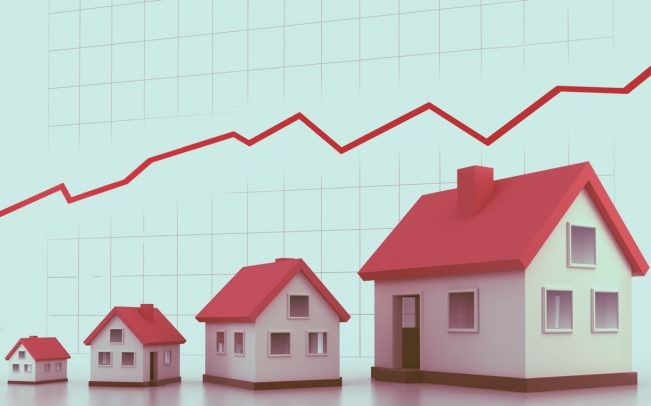

### Steps in Building a Machine Learning Model
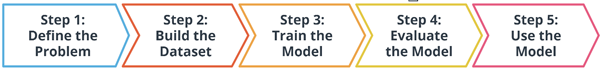

#### STEP ONE: DEFINE THE PROBLEM
* Define a very specific task: Start by studying the task at hand to understand what is expected of you.

* Identify the machine learning task you could use to solve this problem: Determine if it is a supervised or unsupervised  machine learning task. This helps you better understand the data you need for the project. This house price prediction project is a supervised machine learning task. This is particularly because of the presence of labelled data in the dataset.

* Further classify the ML approach to use: I will be using a regression approach because the results to be predicted (housing prices), are not discrete (True/False), but rather are continuous. That is, our label (housing prices) is a number that could, in theory, be any value.

#### STEP TWO: BUILD A DATASET

The next step in developing your ML model is to build your dataset. This is very importand because the results of your model heavily rely on the data collected.

There are four steps in building your dataset

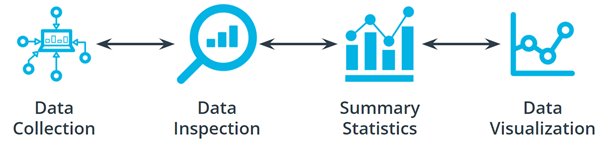

1. Data Collection: Already the dataset has been provided on [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview)
2. Data inspection: The quality of your data will determine how well your model performs. Therefore, I will be inspecting my data for: 
  * Outliers
  * Missing values
  * Data that will need to be encoded.
3. Summary statistics: I will also recommend that you use some statistical tools [Describe function - describe()] to gain further insights on the nature of the dataset.
4. Data visualization: By visualising your data using maybe a line chart, you are better able to identify cases of outliers as well as other trends in your data.


#### Importing Python Libraries

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Importing my dataset

In [87]:
housing = pd.read_csv('C:/Users/manny/OneDrive/C1/Data Science Fellowship/Python/House Prices - Advanced Regression Techniques/train.csv')

In [88]:
housing.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


#### Data Inspection

In [89]:
housing.shape

(1460, 81)

In [90]:
# Summary statistics of my dataset

housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [91]:
housing.isna().sum().head(20)
#housing.notnull().sum().tail(20)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
dtype: int64

#### Data Cleaning

In [92]:
# Fill missing values on LotFrontage column with their average of the columns data.
# From thr result of the describe function, the average of the column's data is 70.049958

housing['LotFrontage'].fillna(70.049958, inplace = True)

In [93]:
housing['LotFrontage'].isna().sum()

0

In [94]:
housing['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [95]:
housing['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

#### Replacing Missing Values with 'None'
From my understanding of the dataset, the following columns had missing values to show that the house lacked such features. Therefore, for the purpose of encoding, I have named the empty rows lacking such features as 'None'.

In [96]:
housing['Alley'] = housing['Alley'].fillna('None')
housing['PoolQC'] = housing['PoolQC'].fillna('None')
housing['Fence'] = housing['Fence'].fillna('None')
housing['MiscFeature'] = housing['MiscFeature'].fillna('None')
housing['MasVnrType'] = housing['MasVnrType'].fillna('None')
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(0)

In [97]:
housing['Alley'].value_counts()

None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [98]:
housing['PoolQC'].value_counts()

None    1453
Gd         3
Fa         2
Ex         2
Name: PoolQC, dtype: int64

In [99]:
housing['Fence'].value_counts()

None     1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [100]:
housing['MiscFeature'].value_counts()

None    1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

In [101]:
housing['Electrical'].fillna(method = 'ffill', inplace = True)

In [102]:
housing['Electrical'].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [103]:
housing['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [104]:
# By comparing labels 'Fireplace' and 'FireplaceQu' I noticed that the properties having missing values in 'FireplaceQu', 
# simply did not have a Fireplace.
# Therefore, I will replace the missing values in 'FireplaceQu' with 'None' - No fireplace.

housing[['Fireplaces','FireplaceQu']].head(20) #Extracting the 'Fireplaces' and 'FireplaceQu' labels for comparism.

,Fireplaces,FireplaceQu
0,0,NaN
1,1,TA
2,1,TA
3,1,Gd
4,1,TA
5,0,NaN
6,1,Gd
7,2,TA
8,2,TA
9,2,TA


In [105]:
housing['FireplaceQu'] = housing['FireplaceQu'].fillna('None')

In [106]:
# By comparing labels 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1', 'BsmtFinType2' I noticed that the properties having missing values, 
# simply did not have a Basement.
# Therefore, I will replace the missing values in 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1', 'BsmtFinType2' with 'None' - No fireplace.

housing[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1', 'BsmtFinType2']].head(20) #Extracting the labels for comparism.

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
0,Gd,TA,No,GLQ,Unf
1,Gd,TA,Gd,ALQ,Unf
2,Gd,TA,Mn,GLQ,Unf
3,TA,Gd,No,ALQ,Unf
4,Gd,TA,Av,GLQ,Unf
5,Gd,TA,No,GLQ,Unf
6,Ex,TA,Av,GLQ,Unf
7,Gd,TA,Mn,ALQ,BLQ
8,TA,TA,No,Unf,Unf
9,TA,TA,No,GLQ,Unf


In [107]:
housing['BsmtQual'].fillna('None', inplace = True)
housing['BsmtCond'].fillna('None', inplace = True)
housing['BsmtExposure'].fillna('None', inplace = True)
housing['BsmtFinType1'].fillna('None', inplace = True)
housing['BsmtFinType2'].fillna('None', inplace = True)

In [108]:
# By comparing labels 'GarageType','GarageYrBlt','GarageFinish','GarageQual', 'GarageCond' you will notice that the properties having missing values,
# simply do not have a Garage.
# Therefore, I will replace the missing values in 'GarageType','GarageYrBlt','GarageFinish','GarageQual', 'GarageCond' with 'None' - No garage.

housing[['GarageType','GarageYrBlt','GarageFinish','GarageQual', 'GarageCond']].tail(12) #Extracting the labels for comparism.

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
1448,Detchd,1950.0,Unf,Fa,TA
1449,NaN,NaN,NaN,NaN,NaN
1450,NaN,NaN,NaN,NaN,NaN
1451,Attchd,2008.0,Fin,TA,TA
1452,Basment,2005.0,Fin,TA,TA
1453,NaN,NaN,NaN,NaN,NaN
1454,Attchd,2004.0,RFn,TA,TA
1455,Attchd,1999.0,RFn,TA,TA
1456,Attchd,1978.0,Unf,TA,TA
1457,Attchd,1941.0,RFn,TA,TA


In [109]:
housing['GarageType'].fillna('None', inplace = True)
housing['GarageYrBlt'].fillna('None', inplace = True)
housing['GarageFinish'].fillna('None', inplace = True)
housing['GarageQual'].fillna('None', inplace = True)
housing['GarageCond'].fillna('None', inplace = True)

In [110]:
#All cases of missing values have been corrected.

housing.isna().sum().head(10)

Id             0
MSSubClass     0
MSZoning       0
LotFrontage    0
LotArea        0
Street         0
Alley          0
LotShape       0
LandContour    0
Utilities      0
dtype: int64

In [116]:
# If necessary you can run some data visualization to identify cases of outliers as well as other trends in the dataset.

In [112]:
# Drop labels: ID because ID is just a series of distinct numbers for identifying each property and is not necessary for the ML model.
housing.drop(['Id'], axis = 1, inplace = True)

In [113]:
# I am dropping 'GarageYrBlt'- Year the garage was built because I have noticed that most of the values are missing and this could hinder 
# the proper execution of my model. Also, the abscence of data on the year the garage was built should not have much impact on my prediction.

housing.drop('GarageYrBlt', axis = 1, inplace = True)

In [114]:
# I will be dropping data column names 'LotFrontage', which is the linear feet of the street connected to the property. This is because one-fifth 
# of the entire data is missing, besides other details such as the 'LotArea', etc, contained in the dataset should be enough for our model.

housing.drop('LotFrontage', axis = 1, inplace = True)

In [115]:
housing.head(10)

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,50,RL,14115,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,10084,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,60,RL,10382,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,50,RM,6120,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,190,RL,7420,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,...,0,None,None,None,0,1,2008,WD,Normal,118000


#### STEP THREE: TRAIN THE MODEL

I am ready to start training my model.

#### 1. Split Dataset into 'Test and Train', and Set the Dependent Column

The first step is to randomly split the dataset.

NB: Your encoding must come AFTER you train test split

In [117]:
from sklearn.model_selection import train_test_split

y = housing['SalePrice']
x = housing.drop(['SalePrice'], axis = 1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True, random_state = 42)

#### 2. Encode Columns
Machine learning models all require input and output variables to be numeric (encoded).

To determine the encoding method to use, I'll be exploring the characteristics of each of the columns that are not yet in numeric form.

In [118]:
housing['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [119]:
housing['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [120]:
housing['Alley'].value_counts()

None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [121]:
housing['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [122]:
housing['LandContour'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [123]:
housing['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [124]:
housing['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

There are about 32 other columns I would like to have explored but for time I'll use the description guide to understand the features of each column and determine what encoding method to apply.

#### One-Hot Encoding
This is the first encoding method I will be applying. It will be applied to the following columns:
Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, BldgType, MasVnrType, ExterQual, ExterCond, BsmtExposure, HeatingQC, CentralAir, Electrical, KitchenQual, GarageFinish, PavedDrive, PoolQC, Fence.

One hot encoding can be applied to categorical variables where no ordinal relationship exist. This is what the method actually looks like. 

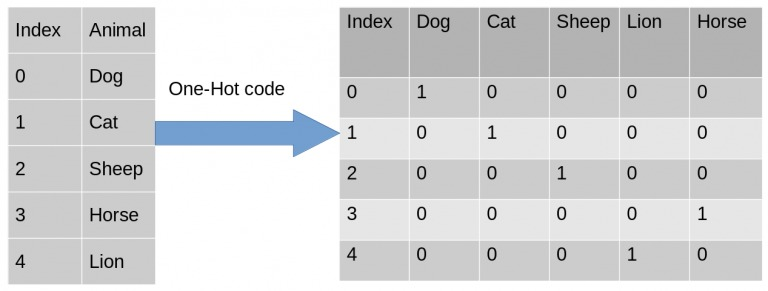

The category values are replaced with 0's and 1's.

Also, I am using One hot encoding for columns with 5 distinct category values and less. This is so as not to have so many new columns added to dataset. Referred to as the Curse of Dimensionality!!!

In [125]:
housing.dtypes

MSSubClass        int64
MSZoning         object
LotArea           int64
Street           object
Alley            object
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 78, dtype: object

In [126]:
import category_encoders as ce
ce_one = ce.OneHotEncoder(cols=['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'BldgType', 
                                'MasVnrType', 'ExterQual', 'ExterCond', 'BsmtExposure', 'HeatingQC', 'CentralAir', 'Electrical', 
                                'KitchenQual', 'GarageFinish', 'PavedDrive', 'PoolQC', 'Fence'], use_cat_names=False) #instantiate the one_hot encoder

x_train = ce_one.fit_transform(x_train)

C:\Users\manny\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [127]:
x_train.head(10)

,MSSubClass,MSZoning,LotArea,Street_1,Street_2,Alley_1,Alley_2,Alley_3,LotShape_1,LotShape_2,...,Fence_2,Fence_3,Fence_4,Fence_5,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,20,RL,8400,1,0,1,0,0,1,0,...,0,0,0,0,None,0,6,2010,WD,Normal
1066,60,RL,7837,1,0,1,0,0,0,1,...,0,0,0,0,None,0,5,2009,WD,Normal
638,30,RL,8777,1,0,1,0,0,1,0,...,1,0,0,0,None,0,5,2008,WD,Normal
799,50,RL,7200,1,0,1,0,0,1,0,...,1,0,0,0,None,0,6,2007,WD,Normal
380,50,RL,5000,1,0,0,1,0,1,0,...,0,0,0,0,None,0,5,2010,WD,Normal
303,20,RL,9800,1,0,1,0,0,1,0,...,0,1,0,0,None,0,7,2006,WD,Abnorml
86,60,RL,11911,1,0,1,0,0,0,0,...,0,0,0,0,None,0,3,2009,WD,Normal
1385,50,RM,5436,1,0,1,0,0,1,0,...,1,0,0,0,None,0,5,2010,WD,Normal
265,20,RL,12090,1,0,1,0,0,0,1,...,0,0,1,0,None,0,6,2008,WD,Normal
793,20,RL,9158,1,0,1,0,0,1,0,...,0,0,0,0,None,0,6,2007,New,Partial


Notice that the number of columns in the above dataset has increased from 81 to 137 just by using the One Hot Encoding approach.

#### Ordinal Encoder
I would like to apply the Label Encoder approach next, but it is much difficult to work with hence my choice of Ordinal Encoder.
* Ordinal Encoder is the same as Label Encoder, only that they are from different libraries.
* To make the encoding process faster, it is better to use Ordinal Encoder instead of label Encoder, to allow us to encode for multiple columns at a time.

I will be applying it to the following columns: MSZoning, Condition1, Condition2, HouseStyle, RoofStyle, RoofMatl, Foundation, BsmtQual, BsmtCond, BsmtFinType1, BsmtFinType2, Heating, Functional, FireplaceQu, GarageType, GarageQual, GarageCond, MiscFeature, SaleType, SaleCondition.

In [128]:
ce_ordinal = ce.OrdinalEncoder(cols=['MSZoning', 'Condition1', 'Condition2', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Foundation', 'BsmtQual', 
                                  'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'Functional', 'FireplaceQu', 'GarageType', 'GarageQual', 
                                  'GarageCond', 'MiscFeature', 'SaleType', 'SaleCondition']) #Instantiating the Ordinal Encoder

x_train = ce_ordinal.fit_transform(x_train)

C:\Users\manny\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [129]:
x_train.head(10)

,MSSubClass,MSZoning,LotArea,Street_1,Street_2,Alley_1,Alley_2,Alley_3,LotShape_1,LotShape_2,...,Fence_2,Fence_3,Fence_4,Fence_5,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,20,1,8400,1,0,1,0,0,1,0,...,0,0,0,0,1,0,6,2010,1,1
1066,60,1,7837,1,0,1,0,0,0,1,...,0,0,0,0,1,0,5,2009,1,1
638,30,1,8777,1,0,1,0,0,1,0,...,1,0,0,0,1,0,5,2008,1,1
799,50,1,7200,1,0,1,0,0,1,0,...,1,0,0,0,1,0,6,2007,1,1
380,50,1,5000,1,0,0,1,0,1,0,...,0,0,0,0,1,0,5,2010,1,1
303,20,1,9800,1,0,1,0,0,1,0,...,0,1,0,0,1,0,7,2006,1,2
86,60,1,11911,1,0,1,0,0,0,0,...,0,0,0,0,1,0,3,2009,1,1
1385,50,2,5436,1,0,1,0,0,1,0,...,1,0,0,0,1,0,5,2010,1,1
265,20,1,12090,1,0,1,0,0,0,1,...,0,0,1,0,1,0,6,2008,1,1
793,20,1,9158,1,0,1,0,0,1,0,...,0,0,0,0,1,0,6,2007,2,3


Notice that the with Ordinal Encoding, the number of columns did not increased.

#### BaseN Encoding
In binary encoding, we convert the integers into binary i.e base 2. It is ideal for columns with large categorical types.

I will be applying it to the following columns: Neighborhood, Exterior1st, Exterior2nd.

In [130]:
ce_baseN5 = ce.BaseNEncoder(cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd'], base = 5)
x_train = ce_baseN5.fit_transform(x_train)

C:\Users\manny\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [131]:
x_train.head(10)

,MSSubClass,MSZoning,LotArea,Street_1,Street_2,Alley_1,Alley_2,Alley_3,LotShape_1,LotShape_2,...,Fence_2,Fence_3,Fence_4,Fence_5,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
254,20,1,8400,1,0,1,0,0,1,0,...,0,0,0,0,1,0,6,2010,1,1
1066,60,1,7837,1,0,1,0,0,0,1,...,0,0,0,0,1,0,5,2009,1,1
638,30,1,8777,1,0,1,0,0,1,0,...,1,0,0,0,1,0,5,2008,1,1
799,50,1,7200,1,0,1,0,0,1,0,...,1,0,0,0,1,0,6,2007,1,1
380,50,1,5000,1,0,0,1,0,1,0,...,0,0,0,0,1,0,5,2010,1,1
303,20,1,9800,1,0,1,0,0,1,0,...,0,1,0,0,1,0,7,2006,1,2
86,60,1,11911,1,0,1,0,0,0,0,...,0,0,0,0,1,0,3,2009,1,1
1385,50,2,5436,1,0,1,0,0,1,0,...,1,0,0,0,1,0,5,2010,1,1
265,20,1,12090,1,0,1,0,0,0,1,...,0,0,1,0,1,0,6,2008,1,1
793,20,1,9158,1,0,1,0,0,1,0,...,0,0,0,0,1,0,6,2007,2,3


In [132]:
x_train.dtypes.head(60)

MSSubClass          int64
MSZoning            int32
LotArea             int64
Street_1            int64
Street_2            int64
Alley_1             int64
Alley_2             int64
Alley_3             int64
LotShape_1          int64
LotShape_2          int64
LotShape_3          int64
LotShape_4          int64
LandContour_1       int64
LandContour_2       int64
LandContour_3       int64
LandContour_4       int64
Utilities_1         int64
Utilities_2         int64
LotConfig_1         int64
LotConfig_2         int64
LotConfig_3         int64
LotConfig_4         int64
LotConfig_5         int64
LandSlope_1         int64
LandSlope_2         int64
LandSlope_3         int64
Neighborhood_0      int64
Neighborhood_1      int64
Neighborhood_2      int64
Condition1          int32
Condition2          int32
BldgType_1          int64
BldgType_2          int64
BldgType_3          int64
BldgType_4          int64
BldgType_5          int64
HouseStyle          int32
OverallQual         int64
OverallCond 

#### Now I am done encoding my dataset and it was exhausting!!!!
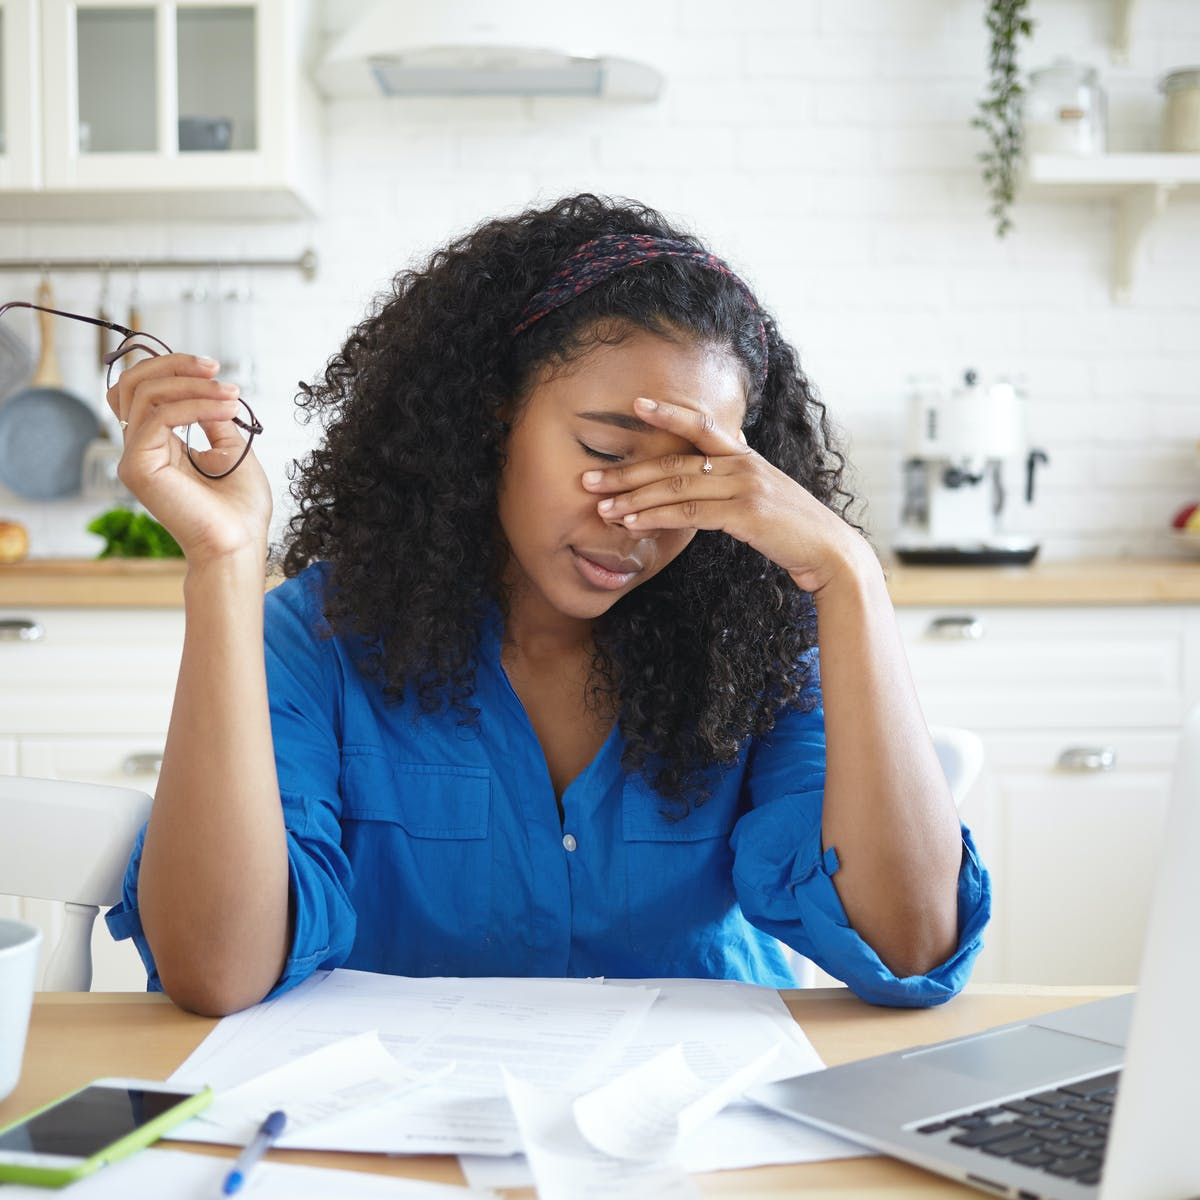

#### Correlation Test
Correlations expose hidden relationships between columns. It could be that some columns on your dataset are either +vely or -vely correlated. That is, their values on the correlation chart are tending closer to +/-1.
It only works for numerical columns and not categorical columns.

In [133]:
x_train.corr()

,MSSubClass,MSZoning,LotArea,Street_1,Street_2,Alley_1,Alley_2,Alley_3,LotShape_1,LotShape_2,...,Fence_2,Fence_3,Fence_4,Fence_5,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
MSSubClass,1.000000,0.292578,-0.116501,-0.056052,0.056052,-0.158987,0.188348,0.046923,0.106312,-0.098122,...,-0.072638,-0.076107,-0.006712,-0.037228,-0.037401,-0.006216,-0.014139,-0.028758,0.056349,-0.003418
MSZoning,0.292578,1.000000,-0.158740,0.003662,-0.003662,-0.324774,0.330147,0.141221,0.206961,-0.209033,...,-0.021916,-0.009232,-0.062458,-0.009305,-0.059869,-0.025149,0.054401,-0.025606,0.077995,0.061106
LotArea,-0.116501,-0.158740,1.000000,-0.241667,0.241667,0.071292,-0.074564,-0.029261,-0.205660,0.074253,...,-0.045024,-0.020256,0.003994,-0.008453,0.121485,0.038358,0.003973,-0.005098,-0.019286,-0.004415
Street_1,-0.056052,0.003662,-0.241667,1.000000,-1.000000,-0.015246,0.009518,0.011598,0.015025,0.010828,...,0.020566,0.011870,0.012397,0.005166,-0.060588,-0.013121,0.013311,-0.008048,0.016365,0.023928
Street_2,0.056052,-0.003662,0.241667,-1.000000,1.000000,0.015246,-0.009518,-0.011598,-0.015025,-0.010828,...,-0.020566,-0.011870,-0.012397,-0.005166,0.060588,0.013121,-0.013311,0.008048,-0.016365,-0.023928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MiscVal,-0.006216,-0.025149,0.038358,-0.013121,0.013121,0.005682,-0.015058,0.005240,-0.045099,0.050547,...,0.030035,-0.010417,0.011757,0.000329,0.531292,1.000000,-0.009815,0.001849,-0.018867,-0.035847
MoSold,-0.014139,0.054401,0.003973,0.013311,-0.013311,0.020217,-0.007471,-0.019659,-0.035521,0.035728,...,-0.017032,0.055429,0.006641,-0.015425,0.009893,-0.009815,1.000000,-0.139848,0.035126,0.064195
YrSold,-0.028758,-0.025606,-0.005098,-0.008048,0.008048,0.033412,-0.002271,-0.040861,0.025830,-0.026690,...,0.079261,-0.002166,-0.006157,-0.024932,0.028816,0.001849,-0.139848,1.000000,-0.023902,-0.126739
SaleType,0.056349,0.077995,-0.019286,0.016365,-0.016365,-0.007083,-0.010266,0.017591,0.002879,0.000248,...,0.008594,-0.009001,-0.027072,-0.003458,-0.005249,-0.018867,0.035126,-0.023902,1.000000,0.246852


#### 3. Building the Model
Seeing that the task at hand is a regression task, I will be using **linear regression** in building my model. This is because linear models are fast to train and give a great baseline against which to compare more complex models. Also note that, most new problems can just easily be solved with simple models without all the complex models we keep hearing about!!!

In [134]:
from sklearn.linear_model import LinearRegression
lr_housing = LinearRegression() #instantiate the regression model
lr_housing.fit(x_train, y_train)

LinearRegression()

#### Encode x_test

In [135]:
# The x_test must be encoded because it will be used to run the predictions!!!

x_test = ce_one.transform(x_test)
x_test = ce_ordinal.transform(x_test)
x_test = ce_baseN5.transform(x_test)

In [136]:
x_test.head(10)

,MSSubClass,MSZoning,LotArea,Street_1,Street_2,Alley_1,Alley_2,Alley_3,LotShape_1,LotShape_2,...,Fence_2,Fence_3,Fence_4,Fence_5,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
892,20,1,8414,1,0,1,0,0,1,0,...,1,0,0,0,1,0,2,2006,1,1
1105,60,1,12256,1,0,1,0,0,0,1,...,0,0,0,0,1,0,4,2010,1,1
413,30,2,8960,1,0,0,0,1,1,0,...,0,0,0,0,1,0,3,2010,1,1
522,50,2,5000,1,0,1,0,0,1,0,...,0,0,0,0,1,0,10,2006,1,1
1036,20,1,12898,1,0,1,0,0,0,1,...,0,0,0,0,1,0,9,2009,1,1
614,180,2,1491,1,0,1,0,0,1,0,...,0,0,0,0,1,0,5,2010,1,1
218,50,1,15660,1,0,1,0,0,0,1,...,0,0,0,0,1,0,5,2008,1,1
1160,160,1,2280,1,0,1,0,0,1,0,...,0,0,0,0,1,0,7,2010,1,1
649,180,2,1936,1,0,1,0,0,1,0,...,1,0,0,0,1,0,12,2007,1,1
887,50,1,16466,1,0,1,0,0,0,1,...,0,0,0,0,1,0,4,2008,1,1


In [137]:
x_test.dtypes.head(60)

MSSubClass          int64
MSZoning            int32
LotArea             int64
Street_1            int64
Street_2            int64
Alley_1             int64
Alley_2             int64
Alley_3             int64
LotShape_1          int64
LotShape_2          int64
LotShape_3          int64
LotShape_4          int64
LandContour_1       int64
LandContour_2       int64
LandContour_3       int64
LandContour_4       int64
Utilities_1         int64
Utilities_2         int64
LotConfig_1         int64
LotConfig_2         int64
LotConfig_3         int64
LotConfig_4         int64
LotConfig_5         int64
LandSlope_1         int64
LandSlope_2         int64
LandSlope_3         int64
Neighborhood_0      int64
Neighborhood_1      int64
Neighborhood_2      int64
Condition1          int32
Condition2          int32
BldgType_1          int64
BldgType_2          int64
BldgType_3          int64
BldgType_4          int64
BldgType_5          int64
HouseStyle          int32
OverallQual         int64
OverallCond 

In [138]:
pred_HousePrice = lr_housing.predict(x_test)

#### STEP FOUR: EVALUATE THE MODEL

Note: We cannot calculate the accuracy for a **regression model**. However, I can determine how close my predictions are to the expected values.
I will be applying the **Mean Absolute Error(MAE)** and **R Squared (R2)** methods in evaluating my model.

In [139]:
# Mean Absolute Error

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred_HousePrice)

21234.69754236157

In [140]:
# R Squared (R2) is also known as the Goodness of fit. 

from sklearn.metrics import r2_score
r2_score(y_test,pred_HousePrice)

0.8136552796568646

As the regression line moves towards perfection, R2 score moves towards '1' and then the model performance improves.  For example I have an R2 score of 0.81 which means my model is able to explain 81 per cent of the variance of data. However, the best possible score is 1.0 and it can be negative, although, in the real world, it is not possible.

#### Let me try using Support Vector Machines to see if I can have a better performing model
Since I am working on a regression task, I will be using a Support Vector Regressor (SVR). Now mind you, support Vector Machines (SVM) can be used for both classification or regression challenges.

Note that SVM doesn’t perform well when we have large data set because the required training time is higher

In [141]:
from sklearn.svm import SVR

SVR_housing = SVR(kernel='linear') #instantiate the Support Vector Regressor
SVR_housing.fit(x_train, y_train)

SVR(kernel='linear')

In [142]:
pred_HousePrice = SVR_housing.predict(x_test)

In [143]:
# Mean Absolute Error

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred_HousePrice)

23266.059993965173

In [144]:
# R Squared (R2) is also known as the Goodness of fit. 

from sklearn.metrics import r2_score
r2_score(y_test,pred_HousePrice)

0.789379172444802

#### Just exactly as I had expected. SVM does not just required longer processing time, it also does not perfrom very well with large datasets. 
linear models are more efficient and they even perform better than complex models in most new problems.

### Therefore, I am sticking to the results from my Linear model's prediction. Now I would like to compare my Predicted SalePrice ('Pred_SalePrice') to the Original SalePrice ('SalePrice')

In [148]:
pred_HousePrice = np.round(pred_HousePrice, decimals = 0)

In [149]:
x_test['Pred_SalePrice'] = pred_HousePrice
x_test['SalePrice'] = y_test

x_test.head(50)

,MSSubClass,MSZoning,LotArea,Street_1,Street_2,Alley_1,Alley_2,Alley_3,LotShape_1,LotShape_2,...,Fence_4,Fence_5,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Pred_SalePrice,SalePrice
892,20,1,8414,1,0,1,0,0,1,0,...,0,0,1,0,2,2006,1,1,144807.0,154500
1105,60,1,12256,1,0,1,0,0,0,1,...,0,0,1,0,4,2010,1,1,298993.0,325000
413,30,2,8960,1,0,0,0,1,1,0,...,0,0,1,0,3,2010,1,1,99143.0,115000
522,50,2,5000,1,0,1,0,0,1,0,...,0,0,1,0,10,2006,1,1,150813.0,159000
1036,20,1,12898,1,0,1,0,0,0,1,...,0,0,1,0,9,2009,1,1,257880.0,315500
614,180,2,1491,1,0,1,0,0,1,0,...,0,0,1,0,5,2010,1,1,60694.0,75500
218,50,1,15660,1,0,1,0,0,0,1,...,0,0,1,0,5,2008,1,1,203890.0,311500
1160,160,1,2280,1,0,1,0,0,1,0,...,0,0,1,0,7,2010,1,1,147841.0,146000
649,180,2,1936,1,0,1,0,0,1,0,...,0,0,1,0,12,2007,1,1,56987.0,84500
887,50,1,16466,1,0,1,0,0,0,1,...,0,0,1,0,4,2008,1,1,142678.0,135500


Judging from the two last columns in the table above ['Pred_SalePrice' and 'SalePrice'], my Linear regression model's predictions were not so bad.

#### STEP FIVE: USE THE MODEL
Now I am ready test my model on an unseen dataset. In machine learning, this process is often called **Model Inference**.

In [150]:
# Import my new dataset

test_housing = pd.read_csv("C:/Users/manny/OneDrive/C1/Data Science Fellowship/Python/House Prices - Advanced Regression Techniques/test.csv")

In [151]:
test_housing.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [152]:
test_housing.isnull().sum().head(20)

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
Alley           1352
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
dtype: int64

In [153]:
test_housing.shape

(1459, 80)

#### Data Cleaning

In [154]:
test_housing.drop(['Id'], axis = 1, inplace = True)

In [155]:
test_housing.drop('GarageYrBlt', axis = 1, inplace = True)

In [156]:
test_housing.drop('LotFrontage', axis = 1, inplace = True)

In [157]:
test_housing.head(10)

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,60,RL,10000,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,20,RL,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,60,RL,8402,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,20,RL,10176,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,20,RL,8400,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [158]:
test_housing.isnull().sum().tail(60)

YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond         78
PavedDrive

In [159]:
test_housing['Alley'].value_counts()

Grvl    70
Pave    37
Name: Alley, dtype: int64

In [160]:
test_housing['GarageType'].value_counts()

Attchd     853
Detchd     392
BuiltIn     98
2Types      17
Basment     17
CarPort      6
Name: GarageType, dtype: int64

In [161]:
test_housing['GarageFinish'].value_counts()

Unf    625
RFn    389
Fin    367
Name: GarageFinish, dtype: int64

In [162]:
test_housing['BsmtExposure'].value_counts()

No    951
Av    197
Gd    142
Mn    125
Name: BsmtExposure, dtype: int64

#### Replacing Missing Values with 'None'

In [163]:
test_housing['Alley'].fillna('None', inplace = True)
test_housing['PoolQC'].fillna('None', inplace = True)
test_housing['Fence'].fillna('None', inplace = True)
test_housing['MiscFeature'].fillna('None', inplace = True)
test_housing['MasVnrType'].fillna('None', inplace = True)
test_housing['MasVnrArea'].fillna(0, inplace = True)

In [164]:
test_housing['BsmtQual'].fillna('None', inplace = True)
test_housing['BsmtCond'].fillna('None', inplace = True)
test_housing['BsmtExposure'].fillna('None', inplace = True)
test_housing['BsmtFinType1'].fillna('None', inplace = True)
test_housing['BsmtFinType2'].fillna('None', inplace = True)

In [165]:
test_housing['FireplaceQu'].fillna('None', inplace = True)
test_housing['GarageType'].fillna('None', inplace = True)
test_housing['GarageFinish'].fillna('None', inplace = True)
test_housing['GarageQual'].fillna('None', inplace = True)
test_housing['GarageCond'].fillna('None', inplace = True)

#### Completing the rest of the missing values by 'Forward Filling' 

In [166]:
test_housing.fillna(method = 'ffill', axis = 0, inplace = True)

In [167]:
test_housing.head(20)

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,11622,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,...,120,0,None,MnPrv,None,0,6,2010,WD,Normal
1,20,RL,14267,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,None,None,Gar2,12500,6,2010,WD,Normal
2,60,RL,13830,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,None,MnPrv,None,0,3,2010,WD,Normal
3,60,RL,9978,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,None,None,None,0,6,2010,WD,Normal
4,120,RL,5005,Pave,None,IR1,HLS,AllPub,Inside,Gtl,...,144,0,None,None,None,0,1,2010,WD,Normal
5,60,RL,10000,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,None,None,None,0,4,2010,WD,Normal
6,20,RL,7980,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,None,GdPrv,Shed,500,3,2010,WD,Normal
7,60,RL,8402,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,None,None,None,0,5,2010,WD,Normal
8,20,RL,10176,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,None,None,None,0,2,2010,WD,Normal
9,20,RL,8400,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,None,MnPrv,None,0,4,2010,WD,Normal


#### Encoding my dataset

In [168]:
# One-Hot Encoding
new_test = ce_one.transform(test_housing)

# Ordinal Encoding
new_test = ce_ordinal.transform(new_test)

# BaseN Encoding
new_test = ce_baseN5.transform(new_test)

In [169]:
new_test.head(50)

,MSSubClass,MSZoning,LotArea,Street_1,Street_2,Alley_1,Alley_2,Alley_3,LotShape_1,LotShape_2,...,Fence_2,Fence_3,Fence_4,Fence_5,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,4,11622,1,0,1,0,0,1,0,...,1,0,0,0,1,0,6,2010,1,1
1,20,1,14267,1,0,1,0,0,0,1,...,0,0,0,0,4,12500,6,2010,1,1
2,60,1,13830,1,0,1,0,0,0,1,...,1,0,0,0,1,0,3,2010,1,1
3,60,1,9978,1,0,1,0,0,0,1,...,0,0,0,0,1,0,6,2010,1,1
4,120,1,5005,1,0,1,0,0,0,1,...,0,0,0,0,1,0,1,2010,1,1
5,60,1,10000,1,0,1,0,0,0,1,...,0,0,0,0,1,0,4,2010,1,1
6,20,1,7980,1,0,1,0,0,0,1,...,0,0,1,0,3,500,3,2010,1,1
7,60,1,8402,1,0,1,0,0,0,1,...,0,0,0,0,1,0,5,2010,1,1
8,20,1,10176,1,0,1,0,0,1,0,...,0,0,0,0,1,0,2,2010,1,1
9,20,1,8400,1,0,1,0,0,1,0,...,1,0,0,0,1,0,4,2010,1,1


In [170]:
new_test.dtypes.head(60)

MSSubClass          int64
MSZoning            int32
LotArea             int64
Street_1            int64
Street_2            int64
Alley_1             int64
Alley_2             int64
Alley_3             int64
LotShape_1          int64
LotShape_2          int64
LotShape_3          int64
LotShape_4          int64
LandContour_1       int64
LandContour_2       int64
LandContour_3       int64
LandContour_4       int64
Utilities_1         int64
Utilities_2         int64
LotConfig_1         int64
LotConfig_2         int64
LotConfig_3         int64
LotConfig_4         int64
LotConfig_5         int64
LandSlope_1         int64
LandSlope_2         int64
LandSlope_3         int64
Neighborhood_0      int64
Neighborhood_1      int64
Neighborhood_2      int64
Condition1          int32
Condition2          int32
BldgType_1          int64
BldgType_2          int64
BldgType_3          int64
BldgType_4          int64
BldgType_5          int64
HouseStyle          int32
OverallQual         int64
OverallCond 

#### Predicting House Prices using my new dataset

In [171]:
# Applying the Linear Regression Model that I developed earlier

pred_test_HousePrice = lr_housing.predict(new_test)

In [172]:
pred_test_HousePrice = np.round(pred_test_HousePrice, decimals = 0)

In [173]:
test_housing['Pred_SalePrice'] = pred_test_HousePrice

In [174]:
test_housing.head(50)

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Pred_SalePrice
0,20,RH,11622,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,...,0,None,MnPrv,None,0,6,2010,WD,Normal,121284.0
1,20,RL,14267,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,...,0,None,None,Gar2,12500,6,2010,WD,Normal,164512.0
2,60,RL,13830,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,...,0,None,MnPrv,None,0,3,2010,WD,Normal,175861.0
3,60,RL,9978,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,...,0,None,None,None,0,6,2010,WD,Normal,183745.0
4,120,RL,5005,Pave,None,IR1,HLS,AllPub,Inside,Gtl,...,0,None,None,None,0,1,2010,WD,Normal,203727.0
5,60,RL,10000,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,...,0,None,None,None,0,4,2010,WD,Normal,163899.0
6,20,RL,7980,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,...,0,None,GdPrv,Shed,500,3,2010,WD,Normal,170590.0
7,60,RL,8402,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,...,0,None,None,None,0,5,2010,WD,Normal,156329.0
8,20,RL,10176,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,...,0,None,None,None,0,2,2010,WD,Normal,194214.0
9,20,RL,8400,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,...,0,None,MnPrv,None,0,4,2010,WD,Normal,102910.0


#### Work Complete!!!!

And my job here is done.

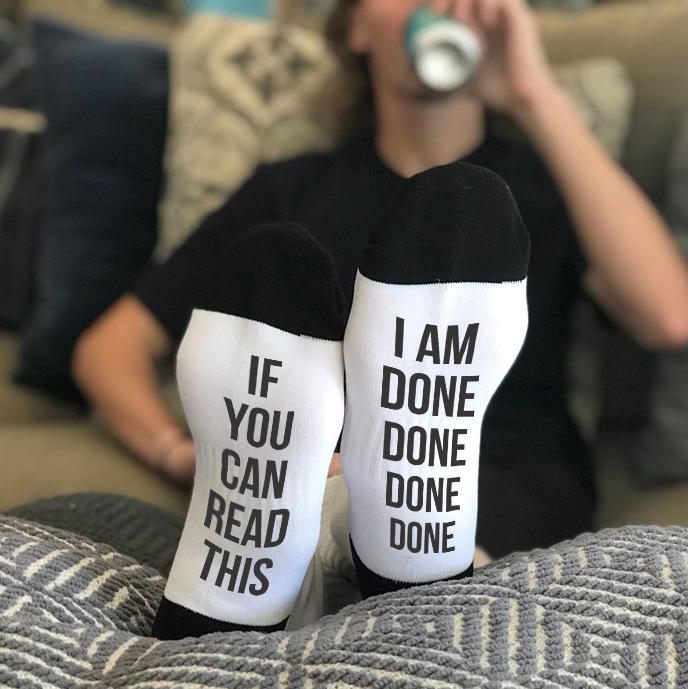